# LIBRARIES

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# DATASET

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Malaria_input.csv')

In [4]:
data.head()

,MONTH,WEEK,MOSQUITO,SPECIES,MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),HUMIDITY (%),AGE CATEGORY,MALE,FEMALE
0,January,1,Pv,imported,True,False,False,False,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,3,3,2
1,January,2,Pv,indigenious,False,True,False,False,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,3,2,0
2,January,3,Pf,indigenious,False,False,False,True,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,3,0,0
3,January,4,Pf,imported,False,False,True,False,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,5,3,3
4,February,1,Pv,imported,True,False,False,False,86.82,79.36,71.86,70.66,0.0,0,5.72,76.3,5,1,0


# VISUALIZATION

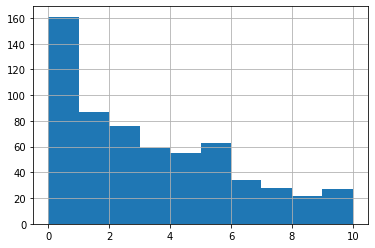

In [5]:
# distribution of number of male cases
data['MALE'].hist()

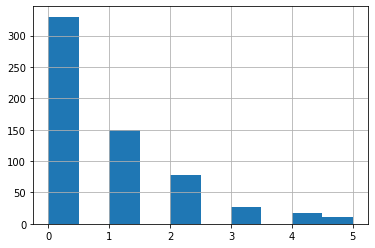

In [6]:
# distribution of number of female cases
data['FEMALE'].hist()

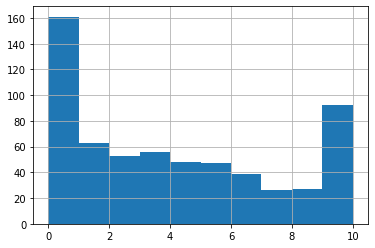

In [7]:
# distribution of number of cases
(data['MALE']+data['FEMALE']).hist()

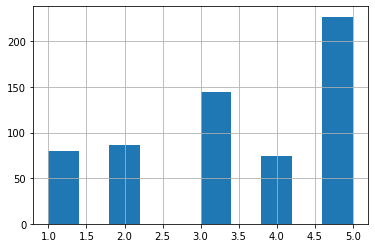

In [8]:
# age distribution of cases
(data['AGE CATEGORY']).hist()

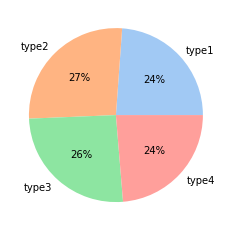

In [9]:
# number of cases per mosquito type

from collections import  Counter
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette('pastel')[0:5]
x = ["type1","type2","type3","type4"]
y = [len([j for j in data["MOSQUITO"+str(i+1)] if j]) for i in range(4)]
plt.pie(y, labels = x, colors = colors, autopct='%.0f%%')
plt.show()

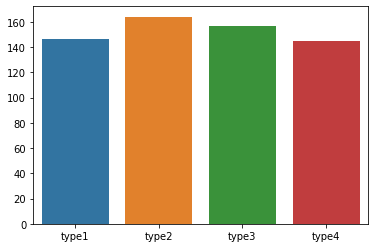

In [10]:
sns.barplot(x=x,y=y)

{'January': 160, 'February': 141, 'March': 52, 'April': 47, 'May': 67, 'June': 47, 'July': 294, 'August': 276, 'September': 347, 'October': 290, 'November': 265, 'December': 300}


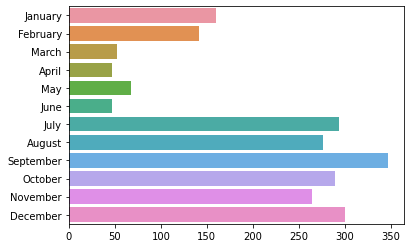

In [11]:
# cases for each month

months_cases = {}
for i in data.index:
    months_cases[data['MONTH'][i]] = months_cases.get(data['MONTH'][i],0)+data['MALE'][i]+data['FEMALE'][i]

print(months_cases)
sns.barplot(x=list(months_cases.values()),y=list(months_cases.keys()))

In [12]:
#climate data for each month

climate = {}
for i in range(0,len(data.index),3):
    temp = climate.get(data['MONTH'][i],[0,0,0,0,0,0])
    temp[0] = temp[0] + float(data['AVG TEMP'][i])
    temp[1] = temp[1] + float(data['DEW POINT (deg F)'][i])
    temp[2] = temp[2] + float(data['PRECIPITATION (in)'][i])
    temp[3] = temp[3] + int(data['# RAINY DAYS '][i])
    temp[4] = temp[4] + float(data['WIND (mph)'][i])
    temp[5] = temp[5] + float(data['HUMIDITY (%)'][i])
    climate[data["MONTH"][i]] = temp

for k,v in climate.items():
  climate[k] = [i/12 if v.index(i)!=3 else i for i in v ]

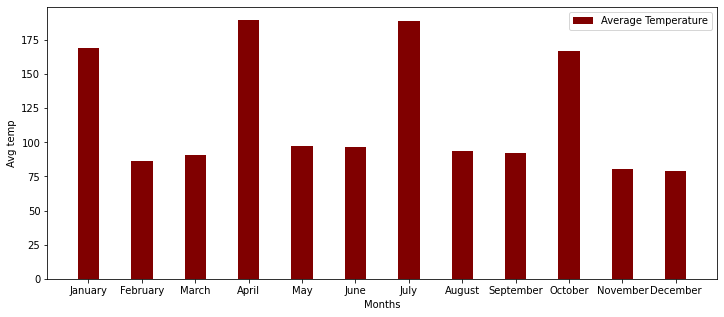

In [14]:
# average temperature per month
fig = plt.figure(figsize = (12, 5))
 
# creating the bar plot
plt.bar(climate.keys(), [i[0] for i in climate.values()], color ='maroon',width = 0.4)

plt.xlabel("Months")
plt.ylabel("Avg temp")
plt.legend(["Average Temperature"])
plt.show()


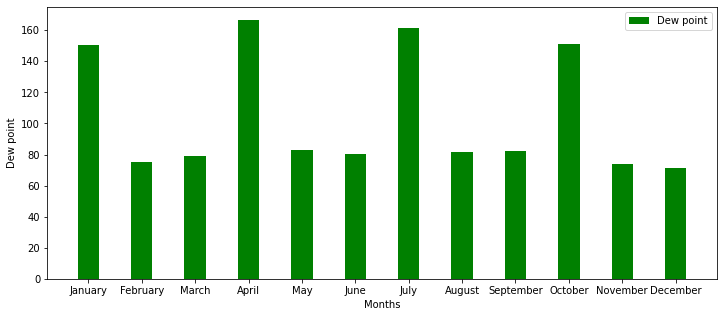

In [15]:
# dew point per month
fig = plt.figure(figsize = (12, 5))
 
# creating the bar plot
plt.bar(climate.keys(), [i[1] for i in climate.values()], color ='green',width = 0.4)
 
plt.xlabel("Months")
plt.ylabel("Dew point")
plt.legend(["Dew point"])

plt.show()

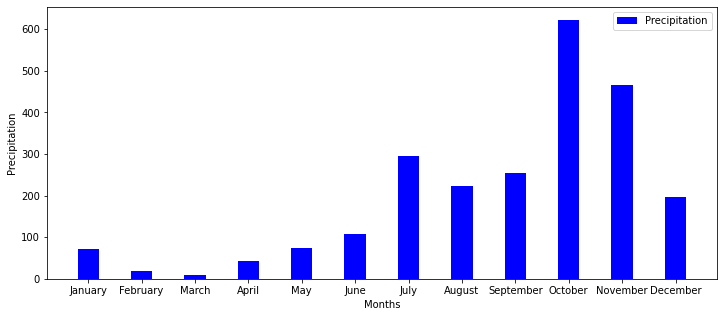

In [16]:
# precipitation per month
fig = plt.figure(figsize = (12, 5))
 
# creating the bar plot
plt.bar(climate.keys(), [i[2] for i in climate.values()], color ='blue',width = 0.4)
 
plt.xlabel("Months")
plt.ylabel("Precipitation")
plt.legend(["Precipitation"])

plt.show()

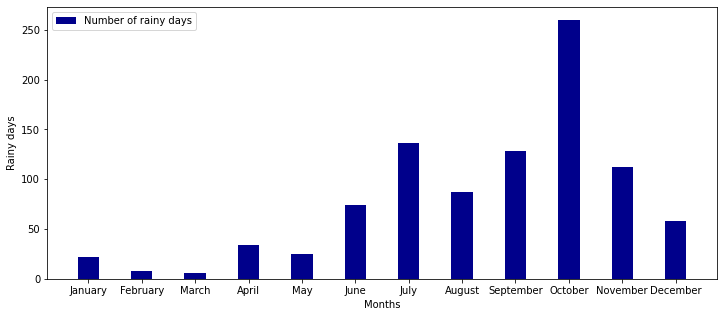

In [17]:
# number of rainy days per month
fig = plt.figure(figsize = (12, 5))
 
# creating the bar plot
plt.bar(climate.keys(), [i[3] for i in climate.values()], color ='darkblue',width = 0.4)
 
plt.xlabel("Months")
plt.ylabel("Rainy days")
plt.legend(["Number of rainy days"])

plt.show()

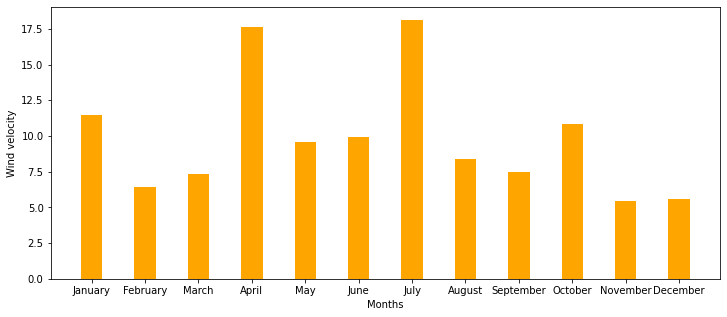

In [ ]:
# wind velocity per month
fig = plt.figure(figsize = (12, 5))
 
# creating the bar plot
plt.bar(climate.keys(), [i[4] for i in climate.values()], color ='orange',width = 0.4)
 
plt.xlabel("Months")
plt.ylabel("Wind velocity")
plt.show()

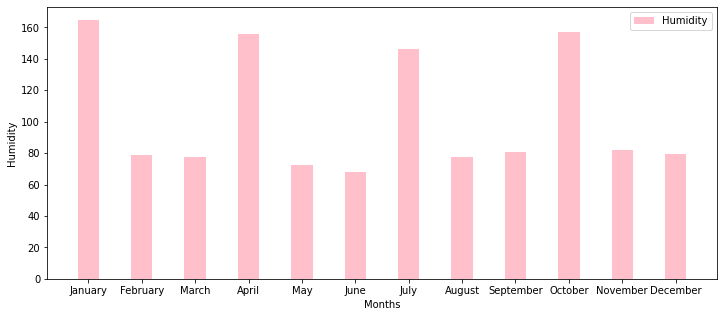

In [18]:
# humidity per month
fig = plt.figure(figsize = (12, 5))
 
# creating the bar plot
plt.bar(climate.keys(), [i[5] for i in climate.values()], color ='pink',width = 0.4)
 
plt.xlabel("Months")
plt.ylabel("Humidity")
plt.legend(["Humidity"])

plt.show()

## PREPROCESSING THE DATA

In [ ]:
attributes = data.drop(data.columns[[2,3,8,9,10]], axis = 1, inplace = False)

In [ ]:
attributes.head()

,MONTH,WEEK,MOSQUITO1,MOSQUITO2,MOSQUITO3,MOSQUITO4,DEW POINT (deg F),PRECIPITATION (in),# RAINY DAYS,WIND (mph),HUMIDITY (%),AGE CATEGORY,MALE,FEMALE
0,January,1,True,False,False,False,69.86,41.7,3,5.49,78.9,3,3,2
1,January,2,False,True,False,False,69.86,41.7,3,5.49,78.9,3,2,0
2,January,3,False,False,False,True,69.86,41.7,3,5.49,78.9,3,0,0
3,January,4,False,False,True,False,69.86,41.7,3,5.49,78.9,5,3,3
4,February,1,True,False,False,False,70.66,0.0,0,5.72,76.3,5,1,0


In [ ]:
inputs = np.array(attributes.drop(attributes.columns[[11,12,13]], axis = 1, inplace = False))
inputs[:5] 

array([['January', 1, True, False, False, False, 69.86, 41.7, 3, 5.49,
        78.9],
       ['January', 2, False, True, False, False, 69.86, 41.7, 3, 5.49,
        78.9],
       ['January', 3, False, False, False, True, 69.86, 41.7, 3, 5.49,
        78.9],
       ['January', 4, False, False, True, False, 69.86, 41.7, 3, 5.49,
        78.9],
       ['February', 1, True, False, False, False, 70.66, 0.0, 0, 5.72,
        76.3]], dtype=object)

In [ ]:
type(inputs[0][5])

bool

*Encoding the months into numbers*

In [ ]:
import collections
month = {}
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for i in range(len(months)):
  month[months[i]] = i
month

{'January': 0,
 'February': 1,
 'March': 2,
 'April': 3,
 'May': 4,
 'June': 5,
 'July': 6,
 'August': 7,
 'September': 8,
 'October': 9,
 'November': 10,
 'December': 11}

In [ ]:
for i in range(len(inputs)):
  inputs[i][0] = month[inputs[i][0]]
  for j in range(2,6):
    if inputs[i][j] == True:
      inputs[i][j] == 1
    else:
      inputs[i][j] == 0

In [ ]:
inputs[:5]

array([[0, 1, True, False, False, False, 69.86, 41.7, 3, 5.49, 78.9],
       [0, 2, False, True, False, False, 69.86, 41.7, 3, 5.49, 78.9],
       [0, 3, False, False, False, True, 69.86, 41.7, 3, 5.49, 78.9],
       [0, 4, False, False, True, False, 69.86, 41.7, 3, 5.49, 78.9],
       [1, 1, True, False, False, False, 70.66, 0.0, 0, 5.72, 76.3]],
      dtype=object)

In [ ]:
labels = np.array(attributes.drop(attributes.columns[:11], axis = 1, inplace = False))
labels[:5] 

array([[3, 3, 2],
       [3, 2, 0],
       [3, 0, 0],
       [5, 3, 3],
       [5, 1, 0]])

# MODEL BUILDING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.30, random_state=42)

In [ ]:
np.shape(X_train)

(428, 11)

In [ ]:
INPUT_DIMS = 11 # 11 ATTRIBUTES
OUTPUT_DIMS = 3 # 3 ATTRIBUTES - AGE, MALE, FEMALE

In [ ]:
model = Sequential()
model.add(Dense(20, activation="tanh", input_dim=INPUT_DIMS, kernel_initializer="GlorotUniform")) # TANH - NON LINEAR REGRESSION
model.add(Dense(OUTPUT_DIMS, activation="linear", kernel_initializer="GlorotUniform"))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 20)                240       
                                                                 
 dense_8 (Dense)             (None, 3)                 63        
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [ ]:
# TENSORFLOW NEEDS FLOAT TO TRAIN - DECIMAL
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [ ]:
model.fit(X_train, y_train, epochs=300, batch_size=30,  verbose=2)

Epoch 1/300
15/15 - 0s - loss: 14.0591 - accuracy: 0.0000e+00 - 327ms/epoch - 22ms/step
Epoch 2/300
15/15 - 0s - loss: 12.2870 - accuracy: 0.0000e+00 - 35ms/epoch - 2ms/step
Epoch 3/300
15/15 - 0s - loss: 10.6420 - accuracy: 0.0818 - 39ms/epoch - 3ms/step
Epoch 4/300
15/15 - 0s - loss: 9.3240 - accuracy: 0.2407 - 32ms/epoch - 2ms/step
Epoch 5/300
15/15 - 0s - loss: 8.3448 - accuracy: 0.3879 - 33ms/epoch - 2ms/step
Epoch 6/300
15/15 - 0s - loss: 7.5255 - accuracy: 0.4836 - 32ms/epoch - 2ms/step
Epoch 7/300
15/15 - 0s - loss: 6.8818 - accuracy: 0.5421 - 32ms/epoch - 2ms/step
Epoch 8/300
15/15 - 0s - loss: 6.3728 - accuracy: 0.5584 - 34ms/epoch - 2ms/step
Epoch 9/300
15/15 - 0s - loss: 5.9225 - accuracy: 0.5864 - 33ms/epoch - 2ms/step
Epoch 10/300
15/15 - 0s - loss: 5.5161 - accuracy: 0.5958 - 34ms/epoch - 2ms/step
Epoch 11/300
15/15 - 0s - loss: 5.1644 - accuracy: 0.6051 - 33ms/epoch - 2ms/step
Epoch 12/300
15/15 - 0s - loss: 4.8569 - accuracy: 0.6075 - 33ms/epoch - 2ms/step
Epoch 13/300

# TESTING,PREDICTION 

In [ ]:
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [ ]:
y_pred[:5]

array([[3.4062862, 4.4534144, 1.1692365],
       [3.5344954, 2.3675468, 0.8539257],
       [3.533639 , 2.3705869, 0.8536975],
       [3.3051414, 2.3342047, 1.0155643],
       [3.531654 , 2.3772202, 0.8557056]], dtype=float32)

In [ ]:
y_pred = np.asarray(y_pred).astype('int')

In [ ]:
y_pred[:5]

array([[3, 4, 1],
       [3, 2, 0],
       [3, 2, 0],
       [3, 2, 1],
       [3, 2, 0]])

In [ ]:
y_pred=np.argmax(y_pred, axis=1)
y_test_pred=np.argmax(y_test, axis=1)
cm_model = confusion_matrix(y_test_pred, y_pred)

print(cm_model)
print(classification_report(y_test_pred, y_pred))

[[96 33]
 [15 40]]
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       129
           1       0.55      0.73      0.62        55

    accuracy                           0.74       184
   macro avg       0.71      0.74      0.71       184
weighted avg       0.77      0.74      0.75       184



Encode year - input, mosquito type - which is more in number - output , visualization